In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [175]:
df = pd.read_csv('realistic_mbti_dataset.csv')

In [204]:
df.shape


(1000, 11)

In [177]:
df['Q1'].value_counts()

Q1
3    343
4    174
2    163
5    162
1    158
Name: count, dtype: int64

In [178]:
df['Q2'].value_counts()

Q2
3    332
1    174
2    171
4    167
5    156
Name: count, dtype: int64

In [179]:
df['mbti_type'].value_counts()

mbti_type
ISFP    100
ESFJ    100
ENFP    100
ENTP    100
ESTJ    100
INTP    100
ESTP    100
INFP    100
ISFJ    100
INFJ    100
Name: count, dtype: int64

In [180]:
df['mbti_type'].unique()

array(['ISFP', 'ESFJ', 'ENFP', 'ENTP', 'ESTJ', 'INTP', 'ESTP', 'INFP',
       'ISFJ', 'INFJ'], dtype=object)

In [181]:
df.isnull().sum()

Q1           0
Q2           0
Q3           0
Q4           0
Q5           0
Q6           0
Q7           0
Q8           0
Q9           0
Q10          0
mbti_type    0
dtype: int64

In [182]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [202]:
num_feature = [cols for cols in df.columns if df[cols].dtype != 'O']
num_feature

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']

In [201]:
cat_feature = [cols for cols in df.columns if df[cols].dtype == 'O']
cat_feature

['mbti_type']

In [183]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [184]:
x

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,3,1,3,3,3,3,3,2,4,4
1,3,3,1,3,4,3,2,2,3,3
2,1,1,2,2,3,3,1,3,4,4
3,2,3,2,2,5,4,3,3,2,4
4,1,3,3,1,3,5,2,1,3,3
...,...,...,...,...,...,...,...,...,...,...
995,3,2,5,4,3,4,4,5,3,2
996,2,2,4,5,4,4,5,5,4,4
997,1,1,4,3,4,3,5,5,2,2
998,2,2,4,5,5,5,5,4,4,4


In [185]:
y.value_counts()

mbti_type
ISFP    100
ESFJ    100
ENFP    100
ENTP    100
ESTJ    100
INTP    100
ESTP    100
INFP    100
ISFJ    100
INFJ    100
Name: count, dtype: int64

In [186]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [187]:
x_train.shape , x_test.shape , y_train.shape

((670, 10), (330, 10), (670,))

In [188]:
y_test

521    INTP
737    INFP
740    INFP
660    ESTP
411    ESTJ
       ... 
506    INTP
342    ENTP
485    ESTJ
711    INFP
133    ESFJ
Name: mbti_type, Length: 330, dtype: object

In [189]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [190]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [191]:
y_test 

array([7, 6, 6, 4, 3, 4, 4, 7, 8, 2, 8, 9, 4, 5, 5, 8, 0, 8, 6, 1, 7, 2,
       1, 7, 0, 0, 2, 5, 5, 5, 1, 2, 4, 3, 1, 2, 4, 7, 5, 9, 1, 9, 1, 5,
       0, 0, 5, 4, 3, 8, 7, 8, 0, 7, 9, 9, 4, 9, 0, 8, 0, 9, 7, 0, 4, 4,
       4, 8, 9, 7, 2, 3, 7, 6, 0, 0, 4, 9, 7, 1, 4, 9, 0, 9, 1, 7, 5, 6,
       6, 1, 1, 3, 7, 0, 6, 3, 6, 9, 9, 8, 6, 1, 5, 0, 4, 4, 7, 5, 2, 5,
       7, 8, 5, 8, 9, 3, 2, 5, 7, 0, 8, 3, 6, 0, 0, 7, 7, 3, 8, 8, 7, 8,
       0, 5, 7, 9, 2, 0, 9, 9, 9, 0, 6, 0, 8, 5, 8, 0, 8, 1, 4, 2, 5, 3,
       5, 3, 1, 4, 9, 8, 7, 6, 4, 4, 8, 4, 0, 4, 1, 1, 1, 3, 2, 5, 3, 1,
       0, 0, 8, 4, 3, 4, 1, 7, 8, 2, 1, 1, 5, 6, 5, 8, 4, 2, 0, 3, 1, 0,
       4, 9, 9, 7, 4, 7, 8, 7, 2, 5, 3, 8, 9, 2, 5, 8, 4, 1, 4, 0, 5, 6,
       1, 6, 5, 9, 8, 9, 7, 1, 5, 7, 1, 5, 3, 7, 9, 9, 0, 5, 2, 1, 9, 0,
       7, 6, 1, 2, 3, 9, 9, 0, 9, 5, 6, 8, 1, 1, 7, 5, 5, 9, 6, 3, 9, 0,
       1, 8, 6, 1, 4, 1, 3, 2, 5, 0, 7, 9, 2, 4, 9, 6, 7, 6, 0, 0, 0, 6,
       1, 3, 0, 5, 5, 6, 7, 3, 1, 3, 5, 3, 9, 2, 7,

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [193]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, 
    roc_auc_score, classification_report
)
from xgboost import XGBClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = {
    "Random Forest": RandomForestClassifier( max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier( max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5),
    "Gradient Boost": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

for name, model in models.items():
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')

    # Test Metrics
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')

    print(f"\n🧠 Model: {name}")
    print("Training Performance:")
    print(f"  Accuracy  : {train_acc:.4f}")
    print(f"  F1 Score  : {train_f1:.4f}")
    print(f"  Precision : {train_precision:.4f}")
    print(f"  Recall    : {train_recall:.4f}")

    print("Test Performance:")
    print(f"  Accuracy  : {test_acc:.4f}")
    print(f"  F1 Score  : {test_f1:.4f}")
    print(f"  Precision : {test_precision:.4f}")
    print(f"  Recall    : {test_recall:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))



🧠 Model: Random Forest
Training Performance:
  Accuracy  : 0.8910
  F1 Score  : 0.8929
  Precision : 0.9049
  Recall    : 0.8910
Test Performance:
  Accuracy  : 0.8667
  F1 Score  : 0.8690
  Precision : 0.8969
  Recall    : 0.8667

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90        39
           1       0.87      0.89      0.88        38
           2       0.81      1.00      0.90        22
           3       1.00      0.63      0.78        30
           4       0.78      0.94      0.85        31
           5       1.00      0.81      0.90        37
           6       0.60      1.00      0.75        28
           7       1.00      0.80      0.89        40
           8       0.92      0.83      0.87        29
           9       0.90      0.97      0.93        36

    accuracy                           0.87       330
   macro avg       0.89      0.87      0.87       330
weighted avg       0.90      0.87      0

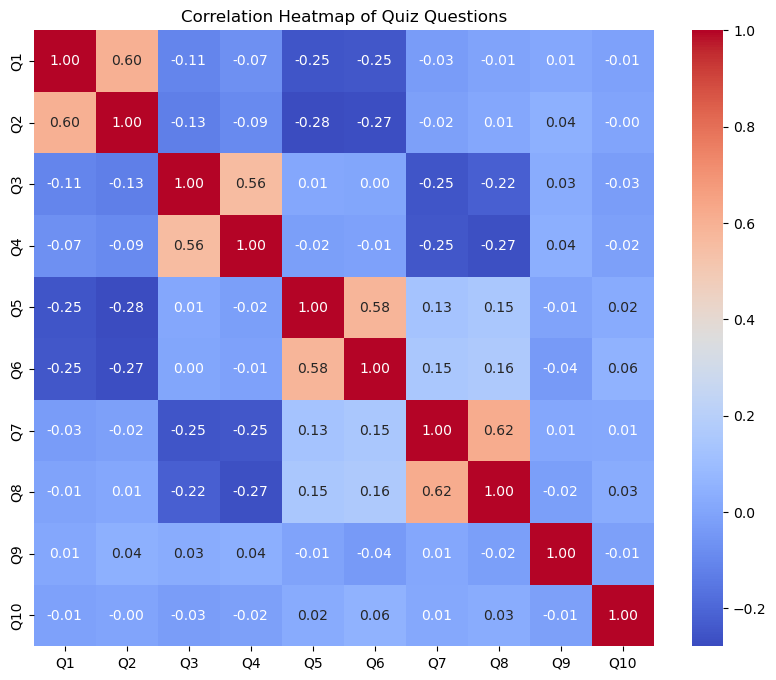

In [194]:
plt.figure(figsize=(10, 8))
corr = df[[f"Q{i+1}" for i in range(10)]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Quiz Questions")
plt.show()


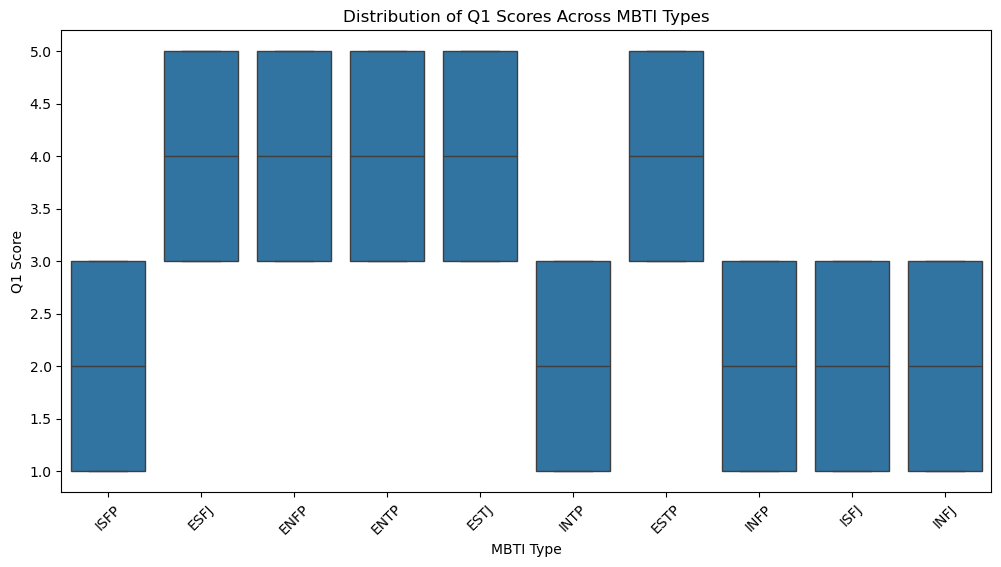

In [195]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='mbti_type', y='Q1')
plt.title("Distribution of Q1 Scores Across MBTI Types")
plt.xlabel("MBTI Type")
plt.ylabel("Q1 Score")
plt.xticks(rotation=45)
plt.show()


In [196]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.019000,2.960000,3.013000,2.987000,3.137000,3.218000,2.795000,2.785000,3.000000,3.031000
std,1.272107,1.287656,1.243534,1.300201,1.236835,1.275187,1.299486,1.287024,0.814041,0.822627
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000


In [200]:
input_data = np.array([[2, 3, 5, 1, 1, 5, 4, 4, 3, 2]])
y_pred = model.predict(input_data)
y_pred = le.inverse_transform(y_pred)
print("Predicted MBTI class:", y_pred[0])


Predicted MBTI class: INFJ
